In [18]:
#Import some of the external libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Import Covid Data
df = pd.read_csv("Covid Data.csv", sep="," , header=0)

df.head(100)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,1,1,1,9999-99-99,97,2,49,2,2,...,2,2,2,2,2,2,2,2,7,97
96,2,1,1,1,9999-99-99,97,2,24,2,2,...,2,2,2,2,2,2,2,2,7,97
97,2,1,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
98,2,1,2,1,9999-99-99,97,2,27,97,2,...,2,2,2,2,2,2,2,1,7,97


In [19]:
#Processing Data

#This code creates a new data frame with '9999-99-99' as the date died and '1' as the died value
DatePresetDead = ['9999-99-99']

DatePresetDeadValue = [1]

listOfDead = list(zip(DatePresetDead, DatePresetDeadValue))

        
dfgenerated = pd.DataFrame(listOfDead, columns=['DATE_DIED','DIED'])

#This merges the two data frames. The purpose of this code is to create a new 'DIED' column in the master data frame. If no date died exists, then we say that they have not died.
df = pd.merge(df, dfgenerated, how="outer",on='DATE_DIED')
#If the DIED value is NULL, it means the individual had a date died field, and so we say that they have died.
df['DIED'].fillna(2, inplace = True)

#Drops the Date_Died Column
df = df.drop("DATE_DIED", axis=1)

In [20]:
#This ensures there are no unexpected values in the data
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

#In the data, 98 and 97 both mean that the individuals pregnancy status was unknown. I have chosen to set these values to no (2) instead
df.PREGNANT = df.PREGNANT.replace(98, 2)
df.PREGNANT = df.PREGNANT.replace(97, 2)

#Drop columns that I am not going to use for the project
df.drop("INTUBED", axis = 1, inplace = True)
df.drop("ICU", axis = 1, inplace = True)
df.drop("MEDICAL_UNIT", axis = 1, inplace = True)
df.drop("USMER", axis = 1, inplace = True)

#In the data, CLASIFFICATION_FINAL says whether or not the patient was diagnosed with covid. 1-3 means that the individual had covid and 4-7 means that the patient did not have covid.
df.CLASIFFICATION_FINAL = df.CLASIFFICATION_FINAL.replace([1,2,3], 1)
df.CLASIFFICATION_FINAL = df.CLASIFFICATION_FINAL.replace([4,5,6,7], 2)

#Drops any row where the idividual did not have covid
df = df[df.CLASIFFICATION_FINAL != 2]

#Drops the classification field since we will not be using it anymore
df.drop("CLASIFFICATION_FINAL", axis = 1, inplace = True)

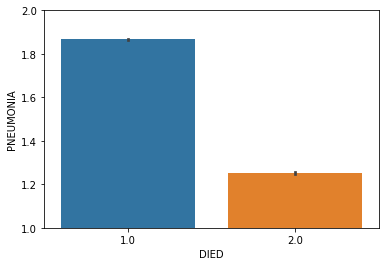

In [21]:
#Compares amount of survived persons with pneumonia with the amount of deceased persons with pneumonia
sns.barplot(x = 'DIED',y = 'PNEUMONIA', data = df)
plt.ylim(1,2)
plt.show()


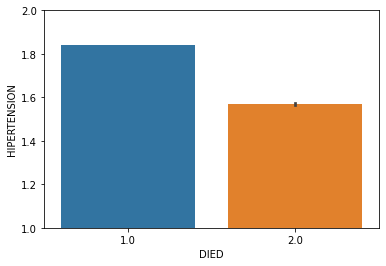

In [22]:
#Compares amount of survived persons with pneumonia with the amount of deceased persons with pneumonia
sns.barplot(x = 'DIED',y = 'HIPERTENSION', data = df)
plt.ylim(1,2)
plt.show()

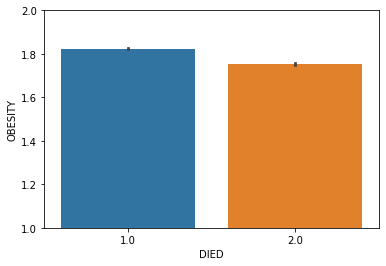

In [23]:
#Compares amount of survived persons with hypertension with the amount of deceased persons with hypertension
sns.barplot(x = 'DIED',y = 'OBESITY', data = df)
plt.ylim(1,2)
plt.show()

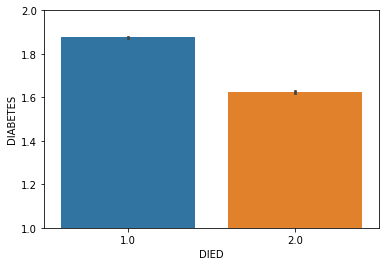

In [24]:
#Compares amount of survived persons with diabetes with the amount of deceased persons with diabetes
sns.barplot(x = 'DIED',y = 'DIABETES', data = df)
plt.ylim(1,2)
plt.show()

In [25]:
#compares the rate of pre-existing conditions for individuals that survived and individuals who did not.
df.groupby(by=["DIED"]).mean()

,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO
DIED,,,,,,,,,,,,,,,
1.0,1.515409,1.182953,1.866454,42.537596,1.992006,1.876075,1.989363,1.972350,1.990054,1.841281,1.978255,1.983312,1.823667,1.986990,1.927816
2.0,1.649644,1.906765,1.250750,61.549869,1.998838,1.623669,1.952980,1.979873,1.973894,1.569771,1.950244,1.947170,1.754573,1.933883,1.918966


In [26]:
#compares the rate of pre-existing conditions for individuals that were hospitilized and those who were not.
df.groupby(by=["PATIENT_TYPE"]).mean()

,SEX,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,DIED
PATIENT_TYPE,,,,,,,,,,,,,,,
1,1.501069,1.956447,40.937831,1.992641,1.902787,1.991949,1.971785,1.992340,1.866106,1.981409,1.986425,1.832388,1.990864,1.928358,1.017825
2,1.617123,1.338329,55.847398,1.993714,1.685458,1.965099,1.977444,1.976387,1.646175,1.956618,1.957830,1.767904,1.951325,1.922136,1.440789


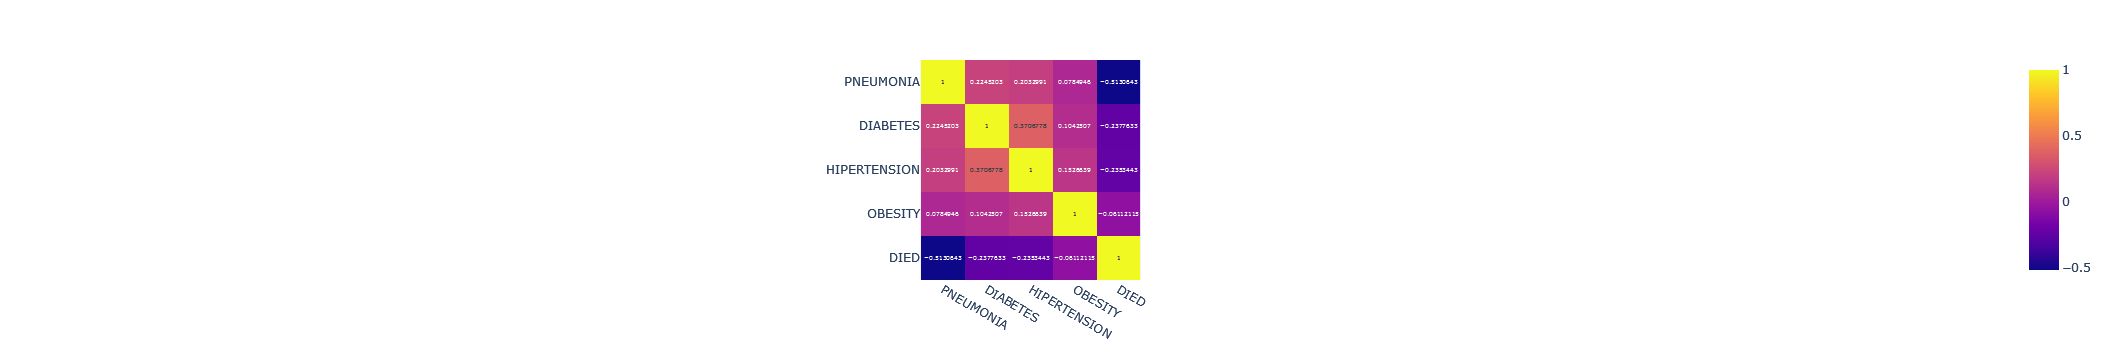

In [27]:
#This code generates a correlation matirx with values that are expected to be highly related to rate of death.
cdf = df.copy()
cdf.drop("OTHER_DISEASE", axis = 1, inplace = True)
cdf.drop("SEX", axis = 1, inplace = True)
cdf.drop("PATIENT_TYPE", axis = 1, inplace = True)
cdf.drop("AGE", axis = 1, inplace = True)
cdf.drop("PREGNANT", axis = 1, inplace = True)
cdf.drop("COPD", axis = 1, inplace = True)
cdf.drop("ASTHMA", axis = 1, inplace = True)
cdf.drop("INMSUPR", axis = 1, inplace = True)
#cdf.drop("HIPERTENSION", axis = 1, inplace = True)
cdf.drop("CARDIOVASCULAR", axis = 1, inplace = True)
#cdf.drop("OBESITY", axis = 1, inplace = True)
cdf.drop("RENAL_CHRONIC", axis = 1, inplace = True)
cdf.drop("TOBACCO", axis = 1, inplace = True)
#cdf.drop("DIABETES", axis = 1, inplace = True)
#cdf.drop("PNEUMONIA", axis = 1, inplace = True)
correlation_matrix = cdf.corr()
fig = px.imshow(correlation_matrix, text_auto=True)
fig.show()

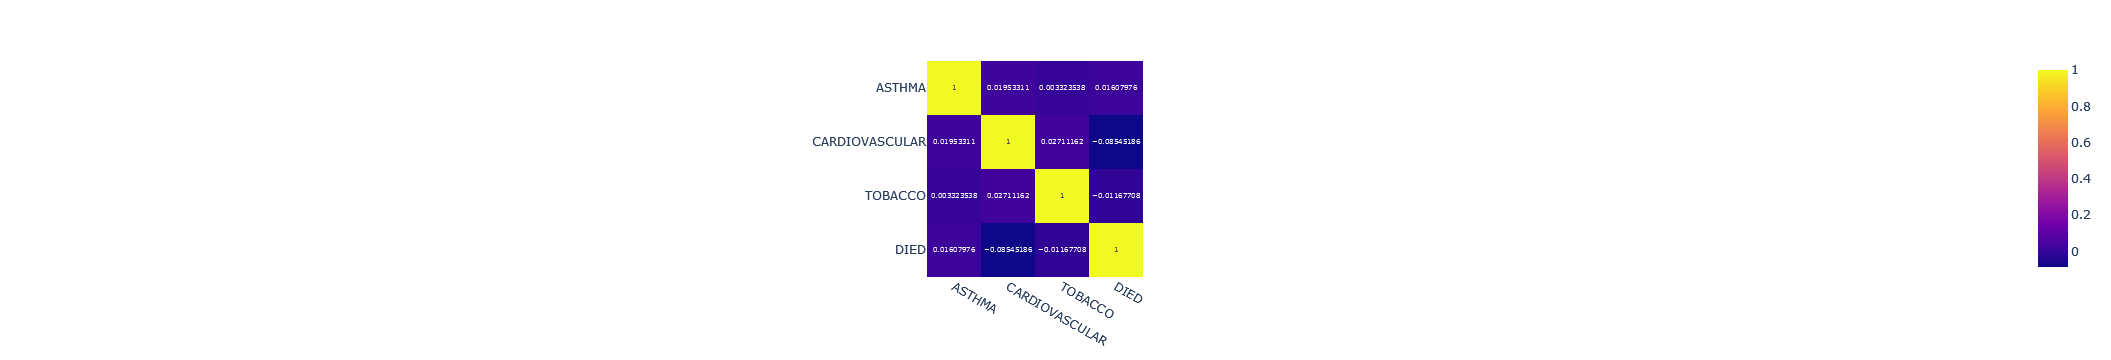

In [28]:
#This does the same as above but uses values that seem to be less related to the rate of death
rdf = df.copy()
rdf.drop("OTHER_DISEASE", axis = 1, inplace = True)
rdf.drop("SEX", axis = 1, inplace = True)
rdf.drop("PATIENT_TYPE", axis = 1, inplace = True)
rdf.drop("AGE", axis = 1, inplace = True)
rdf.drop("PREGNANT", axis = 1, inplace = True)
rdf.drop("COPD", axis = 1, inplace = True)
#rdf.drop("ASTHMA", axis = 1, inplace = True)
rdf.drop("INMSUPR", axis = 1, inplace = True)
rdf.drop("HIPERTENSION", axis = 1, inplace = True)
#rdf.drop("CARDIOVASCULAR", axis = 1, inplace = True)
rdf.drop("OBESITY", axis = 1, inplace = True)
rdf.drop("RENAL_CHRONIC", axis = 1, inplace = True)
#rdf.drop("TOBACCO", axis = 1, inplace = True)
rdf.drop("DIABETES", axis = 1, inplace = True)
rdf.drop("PNEUMONIA", axis = 1, inplace = True)
rcorrelation_matrix = rdf.corr()
rfig = px.imshow(rcorrelation_matrix, text_auto=True)
rfig.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#Randizes the data
shuffled = df.sample(frac=1).reset_index()

#Splits the data into a train set and a set for testing the moddel
train, test = train_test_split(df, test_size=0.2)

predictors = ["SEX",
              "PATIENT_TYPE",  
              "PNEUMONIA",  
              "AGE",  
              "PREGNANT",  
              "DIABETES",  
              "COPD",
             "ASTHMA",
             "INMSUPR",
             "HIPERTENSION",
             "OTHER_DISEASE",
             "CARDIOVASCULAR",
             "OBESITY",
             "RENAL_CHRONIC",
             "TOBACCO"]

#Creates the moddel
X_train = pd.get_dummies(train[predictors],
               drop_first=True)
y_train = train["DIED"]

X_test = pd.get_dummies(test[predictors],
               drop_first=True)

my_lr = LogisticRegression(max_iter=1000000).fit(X_train, y_train)
lr_pred_train = my_lr.predict(X_train)

#Scores the accuracy of the model
metrics.accuracy_score(y_train, lr_pred_train)

0.8920193377091757

In [30]:
#Generates the confusion matrix
metrics.confusion_matrix(y_train, lr_pred_train)

array([[254494,  13897],
       [ 19696,  23015]], dtype=int64)

In [31]:
#This code creates a standard decision tree model
feature_cols = ["SEX",
              "PATIENT_TYPE",  
              "PNEUMONIA",  
              "AGE",  
              "PREGNANT",  
              "DIABETES",  
              "COPD",
             "ASTHMA",
             "INMSUPR",
             "HIPERTENSION",
             "OTHER_DISEASE",
             "CARDIOVASCULAR",
             "OBESITY",
             "RENAL_CHRONIC",
             "TOBACCO"]
#Serprates the data into labels and variables
x = df[feature_cols]
y = df['DIED']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
classifier = DecisionTreeClassifier()

#Creates the model
classifier.fit(X_train, y_train)
#Creates predictions based on the model
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[63331  3735]
 [ 5266  5444]]
              precision    recall  f1-score   support

         1.0       0.92      0.94      0.93     67066
         2.0       0.59      0.51      0.55     10710

    accuracy                           0.88     77776
   macro avg       0.76      0.73      0.74     77776
weighted avg       0.88      0.88      0.88     77776

Accuracy: 0.8842702118905575
